In [ ]:
import seaborn as sns

# Завантажуємо набір даних

In [ ]:
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()

In [ ]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [ ]:
df = pd.DataFrame(dataset['data'], columns = dataset['feature_names'])

In [ ]:
dataset

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

Опис набору даних:

In [ ]:
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
target_col_name = dataset['target_names'][0]

In [ ]:
df[target_col_name] = dataset['target']

In [ ]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
df.shape

(20640, 9)

Опис даних також можна знайти [тут](https://www.kaggle.com/camnugent/california-housing-prices).

Видалимо змінну, щоб вона не займала місце.

In [ ]:
del dataset

Виберемо одну змінну, яка має лінійну залежність із цільовою змінною.

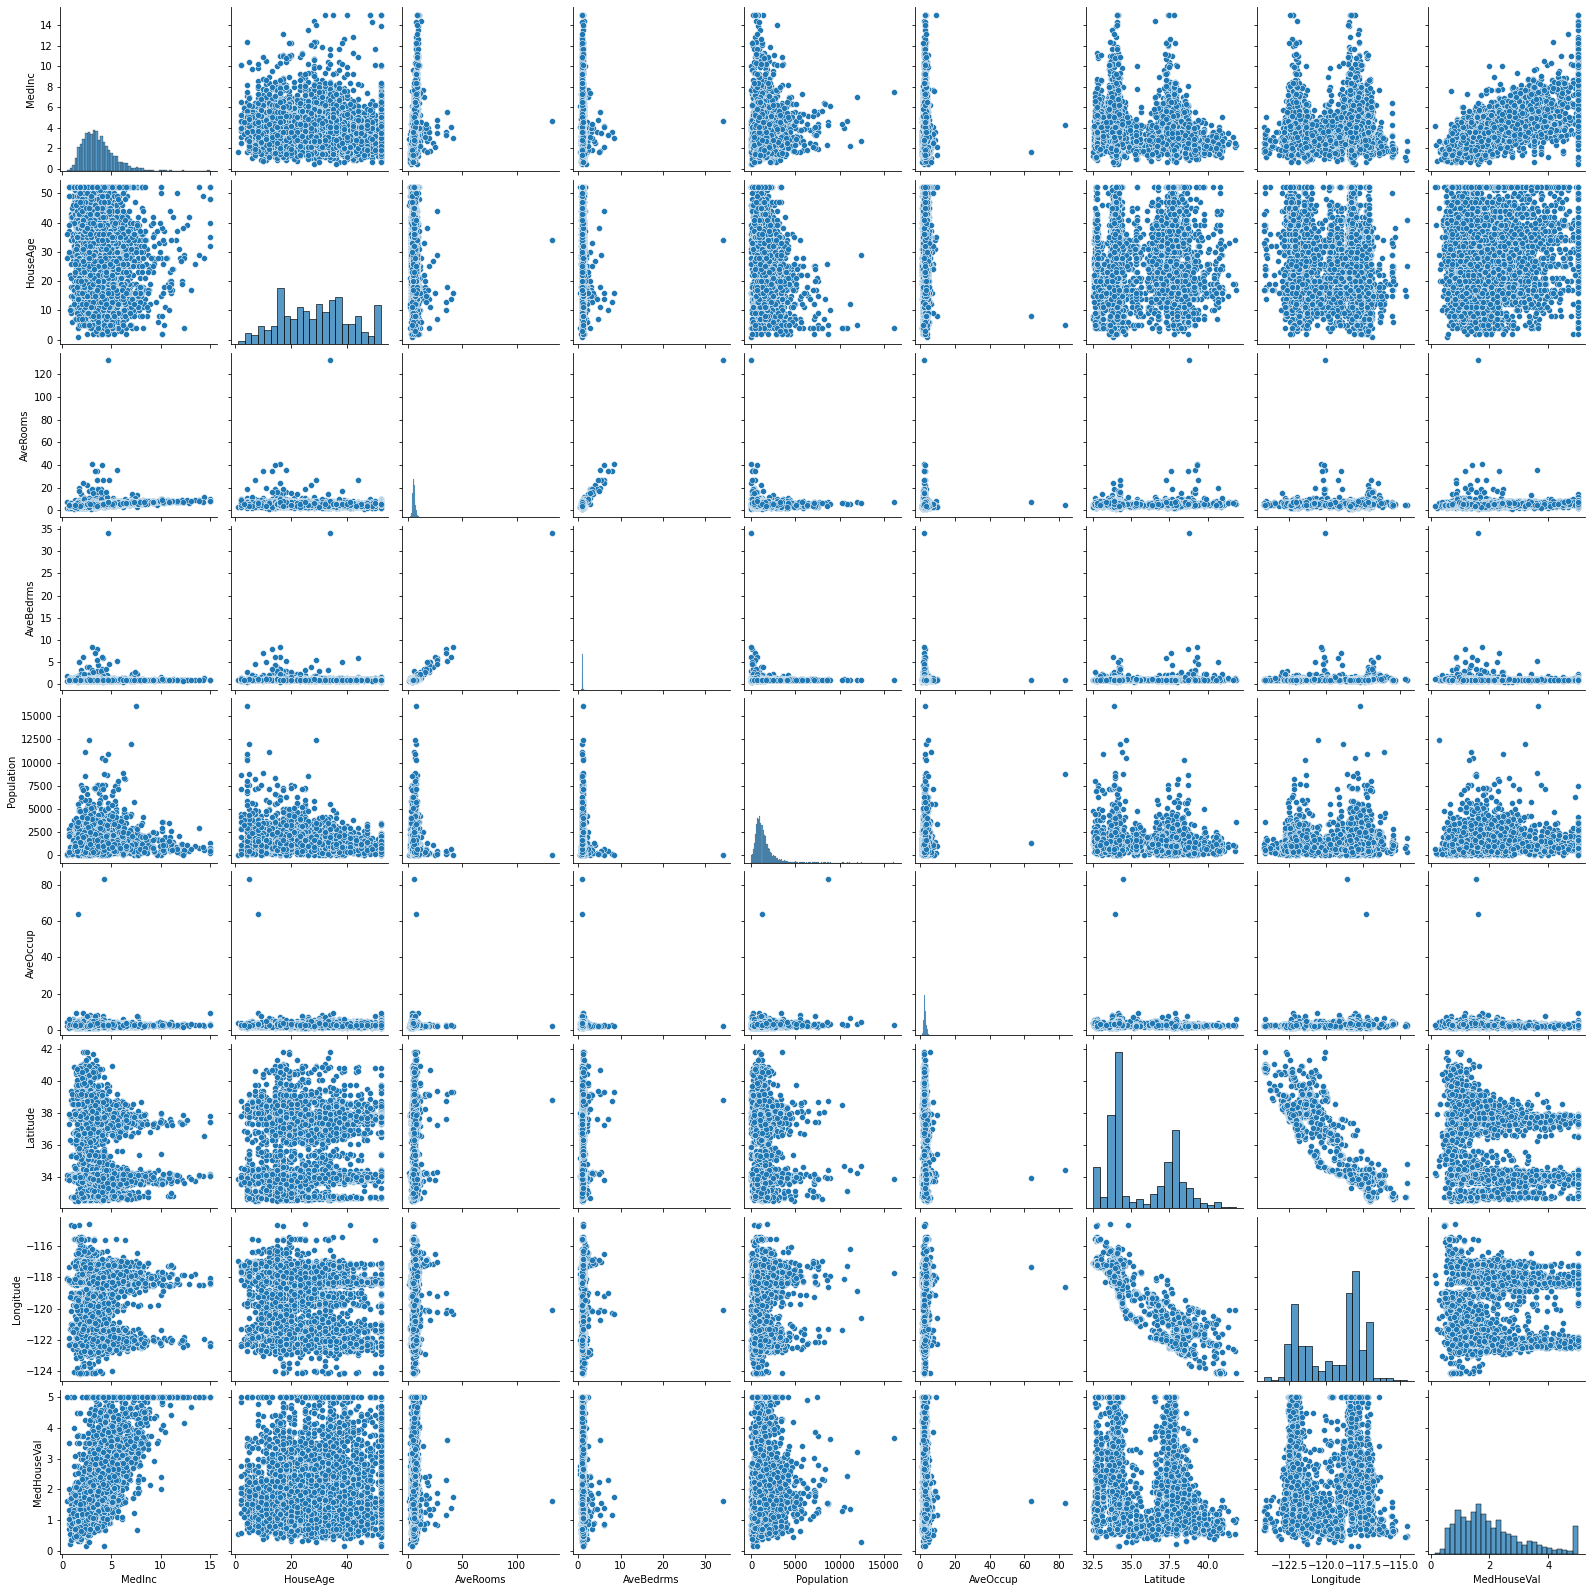

In [ ]:
sns.pairplot(df.sample(frac=0.2, random_state=42))

Видно, що MedInc та MedHouseVal мають схожу лінійну залежність. Можна ще глянути на величину кореляцій.

In [ ]:
df.corr()['MedHouseVal']

MedInc         0.688075
HouseAge       0.105623
AveRooms       0.151948
AveBedrms     -0.046701
Population    -0.024650
AveOccup      -0.023737
Latitude      -0.144160
Longitude     -0.045967
MedHouseVal    1.000000
Name: MedHouseVal, dtype: float64

# Збудуємо просту лінійну регресію

Імпортуємо метод з sklearn.

In [ ]:
from sklearn.linear_model import LinearRegression

Визначимо набір ознак та вибір цільової змінної.

In [ ]:
X = pd.DataFrame(df['MedInc'])
y = df['MedHouseVal']

In [ ]:
lr = LinearRegression()

Так не працюватиме:

In [ ]:
lr.fit(X['MedInc'], y)

ValueError: Expected 2D array, got 1D array instead:
array=[8.3252 8.3014 7.2574 ... 1.7    1.8672 2.3886].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

А ось так буде:

In [ ]:
lr.fit(X, y)

LinearRegression()

Що є всередині lr

In [ ]:
vars(lr)

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['MedInc'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.41793849]),
 '_residues': 14471.346942046543,
 'rank_': 1,
 'singular_': array([272.93370681]),
 'intercept_': 0.45085576703267893}

In [ ]:
lr.coef_, lr.intercept_

(array([0.41793849]), 0.45085576703267893)

Знайдемо передбачення:

In [ ]:
y_pred = lr.predict(X)

Досліджуємо помилки моделі:

In [ ]:
y_df = y.rename('gt').to_frame()

In [ ]:
y_df['pred'] = y_pred

In [ ]:
y_df.head()

,gt,pred
0,4.526,3.930277
1,3.585,3.920330
2,3.521,3.484003
3,3.413,2.809324
4,3.422,2.058331


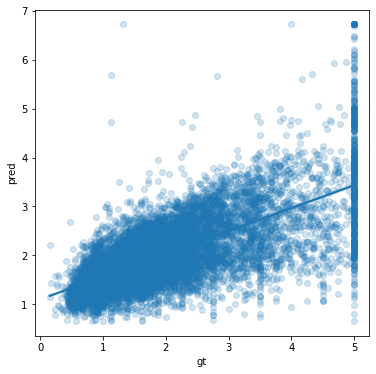

In [ ]:
plt.figure(figsize=(6,6))
sns.regplot(data=y_df.sample(frac=0.5), x='gt', y='pred', scatter_kws={'alpha':0.2});

Корисно розглянути графіки щільності передбачень та проаналізувати, які значення модель передбачає найгірше.

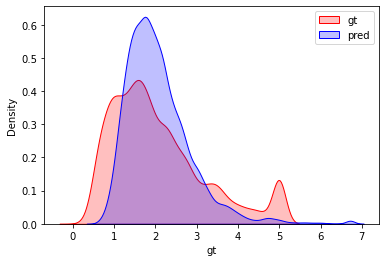

In [ ]:
sns.kdeplot(y_df['gt'], shade=True, color="r", label='gt')
sns.kdeplot(y_df['pred'], shade=True, color="b", label='pred')
plt.legend()
plt.show()

Розрахуємо метрики моделі:

In [ ]:
from sklearn.metrics import mean_squared_error

Mean Squared Error

In [ ]:
mean_squared_error(y_df['gt'], y_df['pred'])

0.7011311502929527

Root Mean Squared Error

In [ ]:
mean_squared_error(y_df['gt'], y_df['pred'], squared=False)

0.8373357452616917

Для інтерпретації значень знайдемо показники розподілу цільової змінної:

In [ ]:
y_df['gt'].describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: gt, dtype: float64

Отже, наша модель помиляється в середньому на 0.84. Так як значення цільової змінної варіюється (розмах вибірки) від 0.14 до 5.0 з середнім рівним 2, результат не такий вже й поганий. **Але** ми отримали такий результат на даних, на яких модель тренувалась. Чи буде модель працювати так само добре на нових даних? Не факт. Це вартує перевірити. 